# BITS WILP MTECH DATA SCIENCE 
# Data Mining Assignment 
# Hyderabad Section: 3, Batch 4 


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

import sklearn.linear_model as skl_lm
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score


import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# for plotting
%matplotlib inline

In [2]:
fileName = "ISP_One_Attrition_Data_file.csv"
df = pd.read_csv(fileName)

In [3]:
df.head(10)

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85
5,1,1601,1280.8,80,4,1,0,31,4,85
6,1,1598,1278.4,81,4,1,0,126,4,85
7,1,1597,1277.6,81,4,1,0,30,4,85
8,1,1604,1283.2,81,4,1,0,49,4,85
9,1,1605,1284.0,81,4,1,0,35,4,85


In [4]:
df.shape

(100000, 10)

In [5]:
for col in df.columns: 
    print(col) 

active_cust
income
expenditure
months_on_network
Num_complaints
number_plan_changes
relocated
monthly_bill
technical_issues_per_month
Speed_test_result


# active_cust : determines which customer stayed and which one left
# This is the predictor column 
# we train the models using Supervised Learning and predict the churn using this attribute.

In [6]:
df.dtypes

active_cust                     int64
income                          int64
expenditure                   float64
months_on_network               int64
Num_complaints                  int64
number_plan_changes             int64
relocated                       int64
monthly_bill                    int64
technical_issues_per_month      int64
Speed_test_result               int64
dtype: object

In [7]:
# using notnull() function  
df.notnull().sum()

active_cust                   100000
income                        100000
expenditure                   100000
months_on_network             100000
Num_complaints                100000
number_plan_changes           100000
relocated                     100000
monthly_bill                  100000
technical_issues_per_month    100000
Speed_test_result             100000
dtype: int64

# All the values are not null.

In [8]:
df.describe()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.578590,1855.279910,1409.669662,58.402450,4.012840,1.385410,0.123480,95.816450,3.31673,81.668540
std,0.493787,2712.385257,2174.330870,18.643736,0.285265,1.617101,0.328989,50.161327,1.24147,9.952554
min,0.000000,1130.000000,904.000000,-20.000000,3.000000,0.000000,0.000000,30.000000,1.00000,72.000000
25%,0.000000,1674.000000,1248.650000,47.000000,4.000000,0.000000,0.000000,45.000000,3.00000,78.000000
50%,1.000000,1805.000000,1358.400000,56.000000,4.000000,1.000000,0.000000,87.000000,4.00000,81.000000
75%,1.000000,1907.000000,1494.400000,70.000000,4.000000,2.000000,0.000000,133.000000,4.00000,85.000000
max,1.000000,229821.000000,183856.800000,449.000000,6.000000,9.000000,1.000000,181.000000,7.00000,332.000000


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
active_cust,100000.0,0.578590,0.493787,0.0,0.00,1.0,1.0,1.0
income,100000.0,1855.279910,2712.385257,1130.0,1674.00,1805.0,1907.0,229821.0
expenditure,100000.0,1409.669662,2174.330870,904.0,1248.65,1358.4,1494.4,183856.8
months_on_network,100000.0,58.402450,18.643736,-20.0,47.00,56.0,70.0,449.0
Num_complaints,100000.0,4.012840,0.285265,3.0,4.00,4.0,4.0,6.0
number_plan_changes,100000.0,1.385410,1.617101,0.0,0.00,1.0,2.0,9.0
relocated,100000.0,0.123480,0.328989,0.0,0.00,0.0,0.0,1.0
monthly_bill,100000.0,95.816450,50.161327,30.0,45.00,87.0,133.0,181.0
technical_issues_per_month,100000.0,3.316730,1.241470,1.0,3.00,4.0,4.0,7.0
Speed_test_result,100000.0,81.668540,9.952554,72.0,78.00,81.0,85.0,332.0


# Normalize all the values to feed in the model

In [10]:


from scipy.stats import zscore
ddf_cust = df.drop('active_cust',axis=1).apply(zscore)

X = ddf_cust.values[:]  ## Features
Y = df['active_cust'].values[:]  ## Target

# Predictor Column Matrix

In [11]:
Y.shape

(100000,)

In [12]:
X.shape

(100000, 9)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9977666666666667

[Text(224.73004579643063, 214.78829268292682, 'X[5] <= 1.144\nentropy = 0.488\nsamples = 100000\nvalue = [42141, 57859]'),
 Text(122.80441863101484, 209.48487804878047, 'X[8] <= -0.318\nentropy = 0.455\nsamples = 87652\nvalue = [30747, 56905]'),
 Text(36.81374936931024, 204.18146341463415, 'X[7] <= 0.148\nentropy = 0.468\nsamples = 27517\nvalue = [17214, 10303]'),
 Text(6.957563349438248, 198.8780487804878, 'X[1] <= 0.067\nentropy = 0.26\nsamples = 5330\nvalue = [818, 4512]'),
 Text(4.463689877818176, 193.57463414634145, 'X[6] <= -0.654\nentropy = 0.145\nsamples = 4540\nvalue = [357, 4183]'),
 Text(2.3933772048305886, 188.2712195121951, 'X[7] <= -0.658\nentropy = 0.05\nsamples = 3212\nvalue = [83, 3129]'),
 Text(1.8451652045294518, 182.96780487804878, 'X[1] <= 0.066\nentropy = 0.032\nsamples = 3119\nvalue = [50, 3069]'),
 Text(1.4841385052101095, 177.66439024390243, 'X[4] <= 0.689\nentropy = 0.029\nsamples = 3106\nvalue = [46, 3060]'),
 Text(0.8569750809305128, 172.3609756097561, 'X[0]

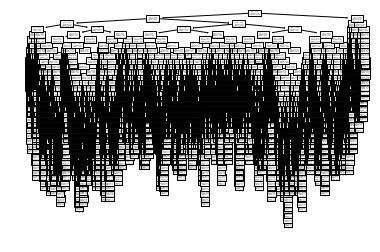

In [15]:
# Plot the tree:
#tree.plot_tree(clf.fit(X, Y)) 

In [16]:

# 1 Logistic Regresssion
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
accuracy_score(Y_test, Y_pred)

C:\Users\Sandeep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7818

In [17]:

# 2 Naive Bayes
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.5121666666666667

In [18]:

### 3 SVM Linear Kernel
model1 = svm.SVC(kernel='linear')
#model1.fit(X_train, Y_train)
#Y_pred = model1.predict(X_test)
#accuracy_score(Y_test, Y_pred)

In [19]:
### 4 SVM RBF Kernel
model1 = svm.SVC(kernel='rbf')
#model1.fit(X_train, Y_train)
#Y_pred = model1.predict(X_test)
#accuracy_score(Y_test, Y_pred)